<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

57.74439530057312


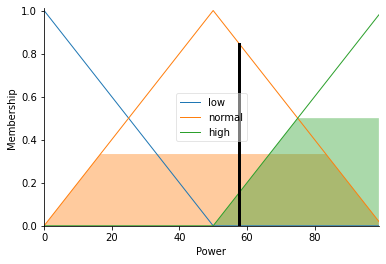

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Nồi cơm điện
time = ctrl.Antecedent(np.arange(10,180,1), 'Time')
rice = ctrl.Antecedent(np.arange(200,1000,1), 'Rice')
power = ctrl.Consequent(np.arange(0,100,1), 'Power')
# tao ham cho tung member
time['veryfast'] = fuzz.trimf(time.universe, [10,10,30])
time['fast'] = fuzz.trimf(time.universe, [30,60,90])
time['normal'] = fuzz.trimf(time.universe, [60,90,120])
time['slow'] = fuzz.trimf(time.universe, [120,150,180])
time['veryslow'] = fuzz.trimf(time.universe, [150,180,180])


rice['less'] = fuzz.trimf(rice.universe, [200,200,500])
rice['normal'] = fuzz.trimf(rice.universe, [200,500,1000])
rice['much'] = fuzz.trimf(rice.universe, [500,1000,1000])


power['low']= fuzz.trimf(power.universe,[0,0,50])
power['normal']= fuzz.trimf(power.universe,[0,50,100])
power['high']= fuzz.trimf(power.universe,[50,100,100])

rule1 = ctrl.Rule(time['veryfast'] & rice['less'], power['normal'])
rule2 = ctrl.Rule(time['veryfast'] & rice['normal'], power['high'])
rule3= ctrl.Rule(time['veryfast'] & rice['much'], power['high'])


rule4 = ctrl.Rule(time['fast'] & rice['less'], power['normal'])
rule5 = ctrl.Rule(time['fast'] & rice['normal'], power['normal'])
rule6 = ctrl.Rule(time['fast'] & rice['much'], power['high'])


rule7 = ctrl.Rule(time['normal'] & rice['less'], power['low'])
rule8 = ctrl.Rule(time['normal'] & rice['normal'], power['normal'])
rule9 = ctrl.Rule(time['normal'] & rice['much'], power['normal'])

rule10 = ctrl.Rule(time['slow'] & rice['less'], power['low'])
rule11 = ctrl.Rule(time['slow'] & rice['normal'], power['low'])
rule12 = ctrl.Rule(time['slow'] & rice['much'], power['normal'])

rule13 = ctrl.Rule(time['veryslow'] & rice['less'], power['low'])
rule14 = ctrl.Rule(time['veryslow'] & rice['normal'], power['low'])
rule15 = ctrl.Rule(time['veryslow'] & rice['much'], power['low'])

powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time'] = 20
powering.input['Rice'] = 400
powering.compute()
print(powering.output['Power'])
power.view(sim=powering)

In [ ]:
# Bồn nước

